In [1]:
from pysus.demography import geobase
from pysus.demography.geobase import GeoBase
%pylab inline

/usr/local/lib/python3.8/dist-packages/geopandas/_compat.py:84: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


Populating the interactive namespace from numpy and matplotlib


# Generating Synthetic demographical data with PySUS
The package `pysus.demography` includes tools to synthetize population data with the same demographical characteristics as the brazilian population.

## Defining the geographical base
Building the geographical base can take a while, because we need to download the data from IBGE, But the data gets cached in the local directory. On a second run the data is loaded much faster. The code below pulls in the map boundaries.

In [2]:
GB = GeoBase(level='State')
gdf = GB.map('all')  # Fetch all states
gdf

Dowloading the Map...


/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
/usr/local/lib/python3.8/dist-packages/pysus/demography/geobase.py:72: UserWarning: this is an initial implementation of Parquet/Feather file support and associated metadata.  This is tracking version 0.1.0 of the metadata specification at https://github.com/geopandas/geo-arrow-spec

This metadata specification does not yet make stability promises.  We do not yet recommend using this in a production setting unless you are able to rewrite your Parquet/Feather files.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')
  self.mapdf.to_parquet(f"{self.level}_map.parquet")


,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ..."
1,12.0,AC,Acre,1.0,Norte,"MULTIPOLYGON (((-73.18253 -7.33550, -72.58477 ..."
2,13.0,AM,Amazonas,1.0,Norte,"MULTIPOLYGON (((-67.32609 2.02971, -67.31682 2..."
3,14.0,RR,Roraima,1.0,Norte,"MULTIPOLYGON (((-60.20051 5.26434, -60.19273 5..."
4,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-54.95431 2.58369, -54.93542 2..."
5,16.0,AP,Amapá,1.0,Norte,"MULTIPOLYGON (((-51.17970 4.00008, -51.17739 3..."
6,17.0,TO,Tocantins,1.0,Norte,"MULTIPOLYGON (((-48.35878 -5.17008, -48.33846 ..."
7,21.0,MA,Maranhão,2.0,Nordeste,"MULTIPOLYGON (((-45.84073 -1.04548, -45.84099 ..."
8,22.0,PI,Piauí,2.0,Nordeste,"MULTIPOLYGON (((-41.74605 -2.80350, -41.73488 ..."
9,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-41.16703 -4.46736, -41.17757 ..."


Here is the cached map file. If you want to redownload the map, in the same working directory, just initialize Geobase with `reset=True`:
```python
GB = GeoBase(level='State', reset=True)
```

In [4]:
# Cached data
!ls *.parquet

State_map.parquet


You can define your geographical base on different levels

In [5]:
print(list(geobase.LEVELS.keys()))

['Country', 'Region', 'State', 'Meso region', 'Micro region', 'Immediate region', 'Census weighting area', 'Census tract', 'Municipality', 'Municipality seats', 'Metropolitan areas', 'Urban footprints', "Brazil's Legal Amazon", 'Biomes', 'Environmental Conservation Units', 'Disaster risk areas', 'Indigenous lands', 'Semi Arid region', 'Health facilities', 'Health regions', 'Neighborhood limits']


PySUS use the `geobr` library to download the maps, thus you can pass aditional parameters to the `map` function depending on the Level you are working at. You can use the `help_fetch_map` method of `GeoBase` to check what parameters are available at the level of you geobase. 

In [4]:
GB.help_fetch_map()

Help on function read_state in module geobr.read_state:

read_state(code_state='all', year=2010, simplified=True, verbose=False)
    Download shapefiles of Brazilian states as geopandas objects.
    
     Data at scale 1:250,000, using Geodetic reference system "SIRGAS2000" and CRS(4674)
    
    Parameters
    ----------
    code_state : str, optional
        The two-digit code of a state or a two-letter uppercase abbreviation 
        (e.g. 33 or "RJ"). If code_state="all", all states will be loaded (Default).
    year : int, optional
        Year of the data, by default 2010
    simplified: boolean, by default True
        Data 'type', indicating whether the function returns the 'original' dataset 
        with high resolution or a dataset with 'simplified' borders (Default)
    verbose : bool, optional
        by default False
    
    Returns
    -------
    gpd.GeoDataFrame
        Metadata and geopackage of selected states
    
    Raises
    ------
    Exception
        If para

## Geting the population data
Now we download the population data, and aggregate for each polygon in our geographical base

In [10]:
GB.demographics()

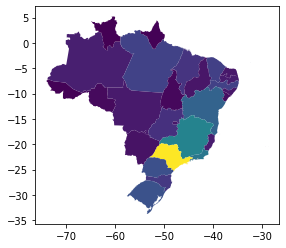

In [8]:
GB.plot_pop()

## Generating the synthetic individuals
First let's reduce our geographical base to a single state to simplify our task.

In [11]:
GB = GeoBase(level='State', reset=True)
gdf = GB.map('MG')  # Fetch only MG
GB.demographics()
gdf

Dowloading the Map...
Fetching population data...


/usr/local/lib/python3.8/dist-packages/pysus/demography/geobase.py:72: UserWarning: this is an initial implementation of Parquet/Feather file support and associated metadata.  This is tracking version 0.1.0 of the metadata specification at https://github.com/geopandas/geo-arrow-spec

This metadata specification does not yet make stability promises.  We do not yet recommend using this in a production setting unless you are able to rewrite your Parquet/Feather files.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')
  self.mapdf.to_parquet(f"{self.level}_map.parquet")


,code_state,abbrev_state,name_state,code_region,name_region,geometry,population
0,31.0,MG,Minas Gerais,3.0,Sudeste,"MULTIPOLYGON (((-41.87545 -20.76487, -41.87338...",2.692211e+07


In [12]:
!ls *.parquet

State_map.parquet


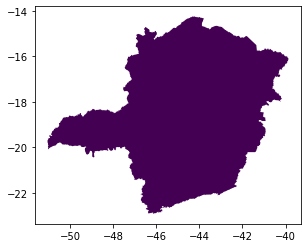

In [13]:
GB.plot_pop()

We will synthesize a population $0.05\%$ the size of the actual population of MG, because this step is very time consuming, but it also gets cached.

In [14]:
GB.generate_populations(scale=0.0005)
!ls *.parquet

Synthetizing 13461 individuals
6924 POINT (-43.25835944309186 -15.04259128237882)
State_map.parquet  State_pop.parquet


/usr/local/lib/python3.8/dist-packages/pysus/demography/geobase.py:74: UserWarning: this is an initial implementation of Parquet/Feather file support and associated metadata.  This is tracking version 0.1.0 of the metadata specification at https://github.com/geopandas/geo-arrow-spec

This metadata specification does not yet make stability promises.  We do not yet recommend using this in a production setting unless you are able to rewrite your Parquet/Feather files.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')
  self.pop.to_parquet(f"{self.level}_pop.parquet")


In [15]:
GB.pop

,sex,age,geometry,longitude,latitude
0,1,3,POINT (-43.25836 -15.04259),-43.258359,-15.042591
1,1,67,POINT (-41.49873 -19.98606),-41.498729,-19.986055
2,1,73,POINT (-46.80902 -19.03101),-46.809017,-19.031014
3,0,66,POINT (-44.66696 -20.21877),-44.666958,-20.218772
4,1,55,POINT (-41.37851 -16.40539),-41.378514,-16.405387
...,...,...,...,...,...
6919,0,75,POINT (-45.30820 -16.25881),-45.308199,-16.258810
6920,1,63,POINT (-43.76239 -14.75533),-43.762389,-14.755328
6921,1,26,POINT (-45.93665 -19.49463),-45.936649,-19.494630
6922,0,28,POINT (-44.78204 -21.19821),-44.782035,-21.198208


Finally, we can plot our population, and see how our synthetic is uniformly distributed over the state of MG.

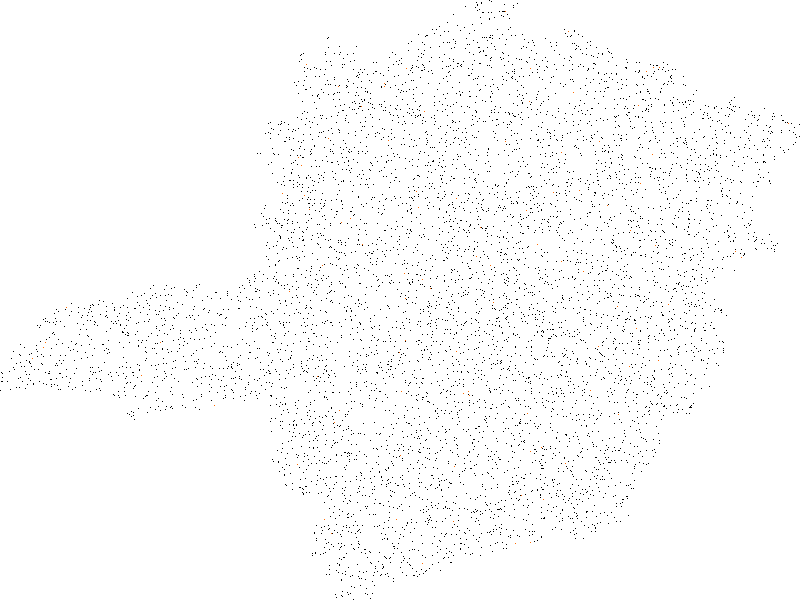

In [16]:
GB.plot_synthetic_pop()